## 位置情報データの処理とループ処理を使ったデータ出力

目的：年平均気温を計算して，地図にプロットする．

- 必要なライブラリをインポートする
- 

- ECMFWにアカウントがあると便利 気象データを多様する場合
- 

### netCDF4 format
https://docs.unidata.ucar.edu/netcdf-c/4.9.2/file_format_specifications.html

In [1]:
# import libraries
import pandas as pd 
import numpy as np 
import netCDF4
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

nc = netCDF4.Dataset('/home/calving/Nextcloud/python/hyoga_gasshuku2024/nc/Moreno2023mon.nc')

In [2]:
#  check nc file variables keys
nc.variables.keys()

dict_keys(['number', 'date', 'latitude', 'longitude', 'expver', 'u10', 'v10', 'd2m', 't2m', 'sp', 'tp', 'ssrd', 'strd'])

Text(0.5, 1.0, '2-meter Temperature (t2m) with Coastlines')

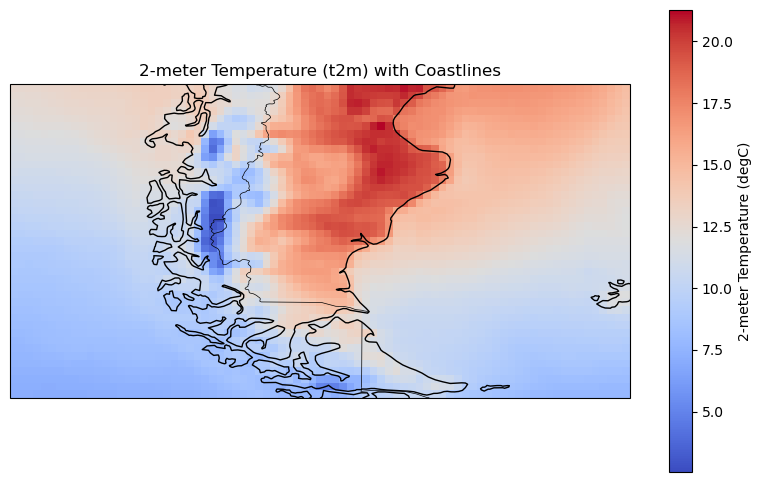

In [10]:
t2m = nc.variables['t2m'][:]         # Temperature at 2 meters
lat = nc.variables['latitude'][:]    # Latitude
lon = nc.variables['longitude'][:]   # Longitude

# Handle time dimension if necessary (e.g., first time step)
t2m_slice = t2m[0, :, :]  # Assuming time is the first dimension; take the first time step

# Create a meshgrid for longitude and latitude
lon_grid, lat_grid = np.meshgrid(lon, lat)

# Set up the plot with Cartopy
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(10, 6))

# Add coastlines and optional features
ax.coastlines(resolution='50m', color='black', linewidth=1)
ax.add_feature(cfeature.BORDERS, linewidth=0.5)
ax.add_feature(cfeature.LAND, facecolor='lightgray', alpha=0.5)

# Plot the temperature data
temperature_plot = ax.pcolormesh(lon_grid, lat_grid, t2m_slice-273.15, shading='auto', 
                                 cmap='coolwarm', transform=ccrs.PlateCarree())
plt.colorbar(temperature_plot, ax=ax, label='2-meter Temperature (degC)')

# Add plot details
ax.set_title('2-meter Temperature (t2m) with Coastlines')



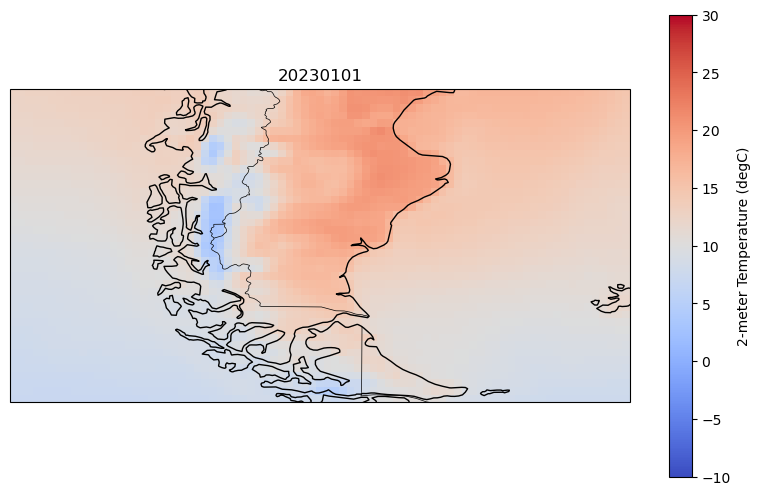

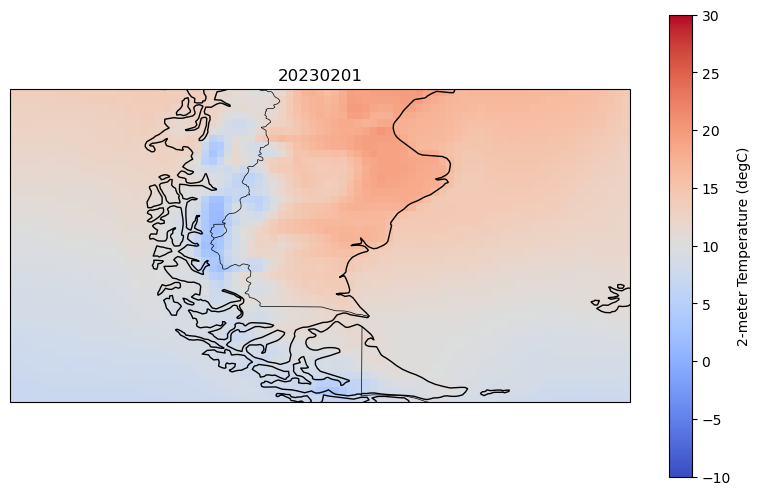

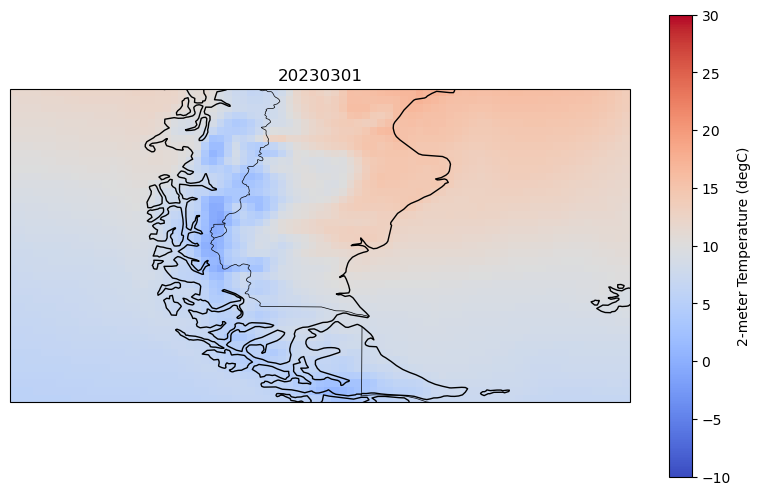

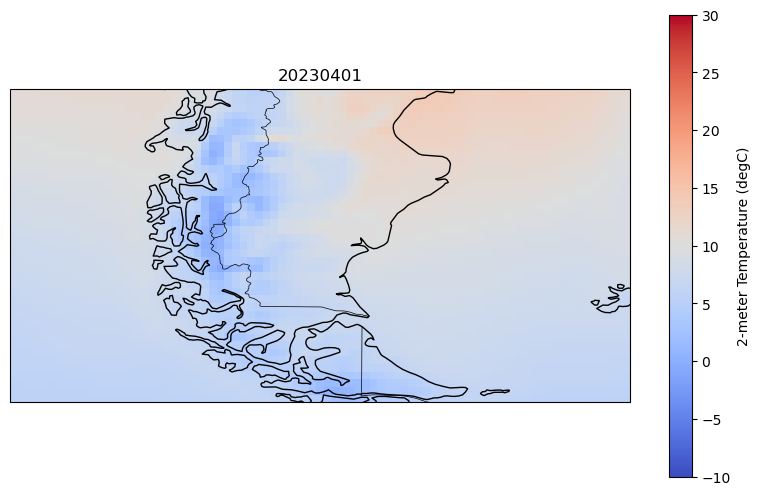

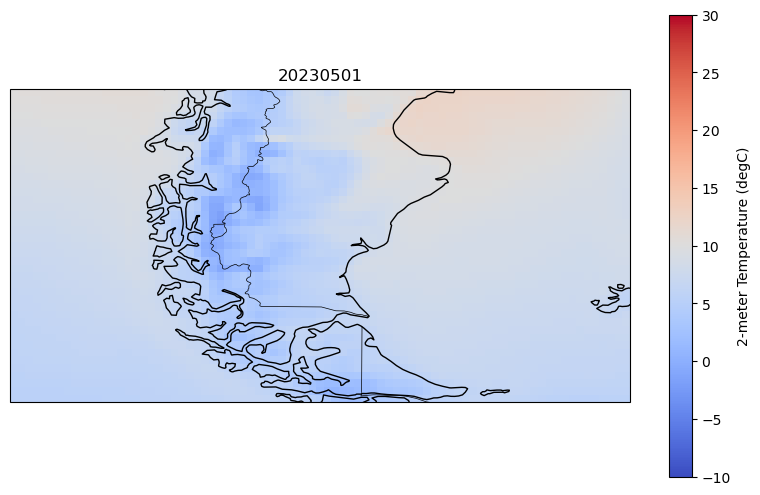

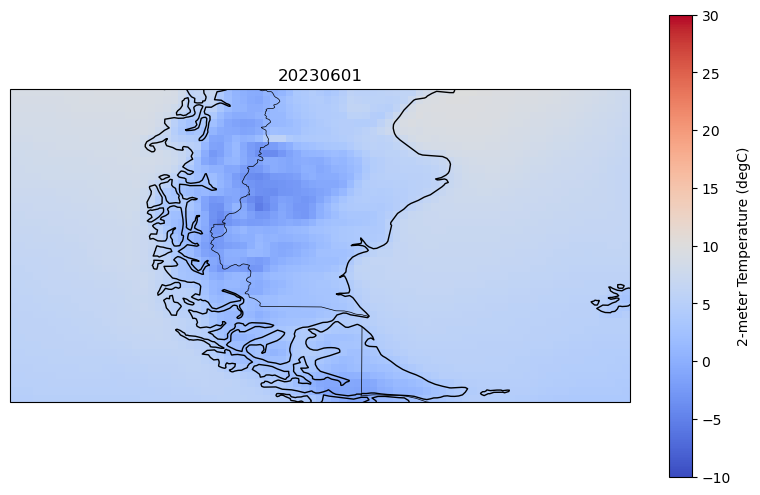

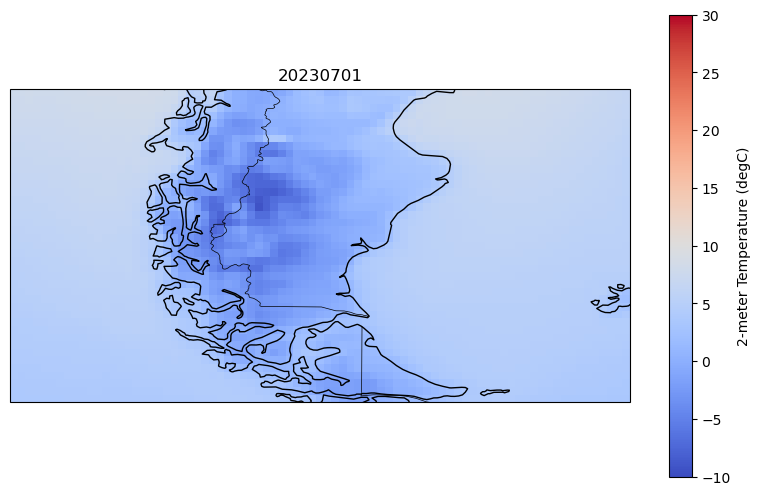

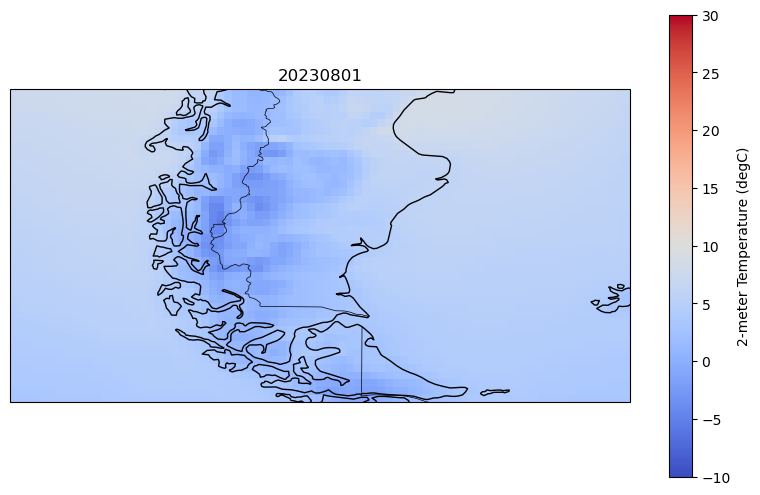

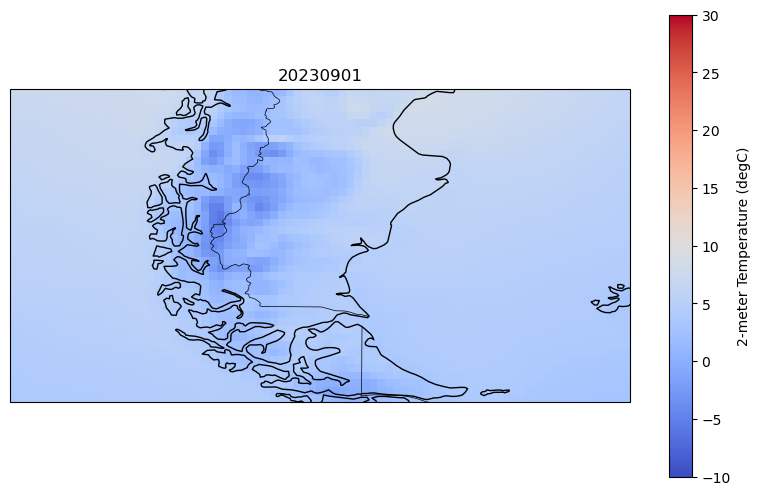

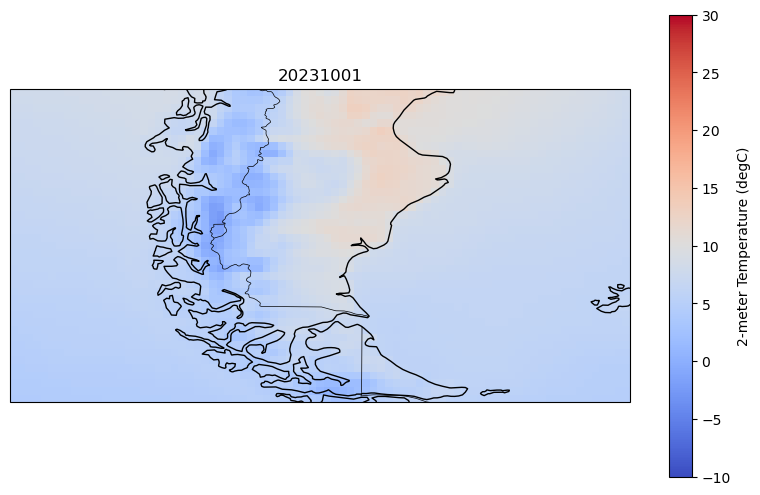

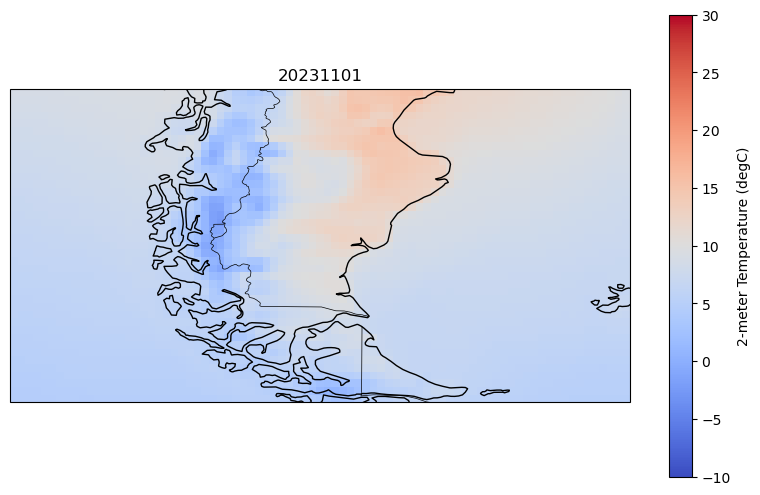

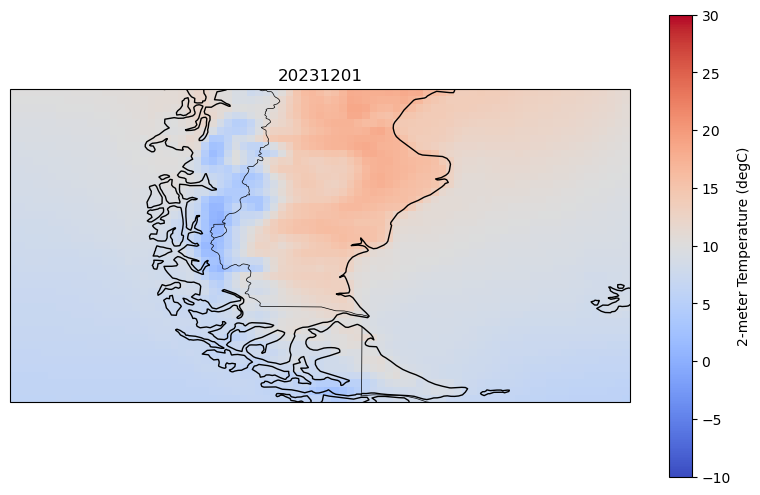

In [12]:
# plot month variables  and save it
# date of the data
date = nc.variables['date'][:]
for i, d in enumerate(date):
    fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(10, 6))

    # Add coastlines and optional features
    ax.coastlines(resolution='50m', color='black', linewidth=1)
    ax.add_feature(cfeature.BORDERS, linewidth=0.5)
    ax.add_feature(cfeature.LAND, facecolor='lightgray', alpha=0.5)

    # Plot the temperature data
    temperature_plot = ax.pcolormesh(lon_grid, lat_grid, t2m[i, :, :]-273.15, shading='auto', 
                                    cmap='coolwarm', transform=ccrs.PlateCarree(), vmin=-10, vmax=30)
    plt.colorbar(temperature_plot, ax=ax, label='2-meter Temperature (degC)')

    # Add plot details
    ax.set_title(d)

Text(0.5, 1.0, 'Annual mean 2023')

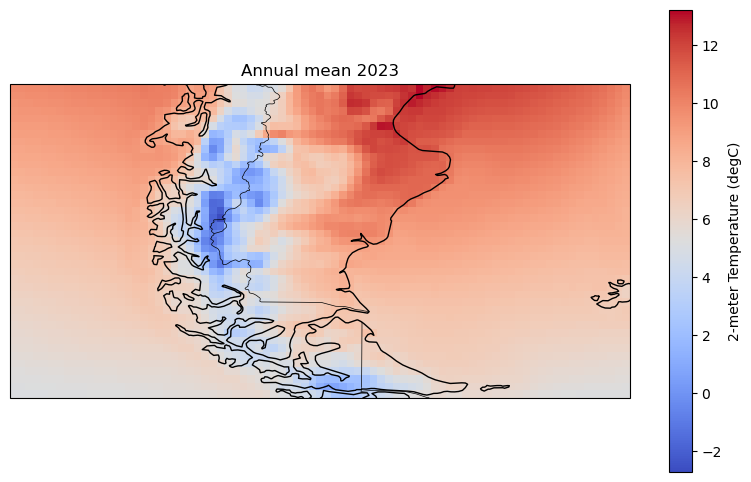

In [ ]:
# calculate mean annual mean
# Handle time dimension if necessary (e.g., first time step)
t2m_mean = np.mean(t2m, axis=0) 

# Create a meshgrid for longitude and latitude
lon_grid, lat_grid = np.meshgrid(lon, lat)

# Set up the plot with Cartopy
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(10, 6))

# Add coastlines and optional features
ax.coastlines(resolution='50m', color='black', linewidth=1)
ax.add_feature(cfeature.BORDERS, linewidth=0.5)
ax.add_feature(cfeature.LAND, facecolor='lightgray', alpha=0.5)

# Plot the temperature data
temperature_plot = ax.pcolormesh(lon_grid, lat_grid, t2m_mean-273.15, shading='auto', 
                                 cmap='coolwarm', transform=ccrs.PlateCarree())
plt.colorbar(temperature_plot, ax=ax, label='2-meter Temperature (degC)')

# Add plot details
ax.set_title('Annual mean 2023')

- その他データ出力?
- 